In [1]:
# !pip install scikit-learn
# !pip install xgboost
# !pip install plotly
# !pip install lifelines
# !pip install shap
# !pip install seaborn

In [2]:
import pandas as pd

In [3]:
df = pd.read_table("msk_met_2021.tsv")
# look at the scope and depth of the data
df.shape

(25775, 55)

In [4]:
# Take a look at the first few rows of the data set
df.head()

,Study ID,Patient ID,Sample ID,Age at Death,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,...,Primary Tumor Site,Race Category,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity
0,msk_met_2021,P-0000004,P-0000004-T01-IM3,40.06,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Breast,White,1,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0
1,msk_met_2021,P-0000015,P-0000015-T01-IM3,45.60,44.25,NaN,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Breast,White,1,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0
2,msk_met_2021,P-0000024,P-0000024-T01-IM3,64.25,59.44,NaN,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,...,Uterus,White,1,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0
3,msk_met_2021,P-0000025,P-0000025-T02-IM5,76.53,69.65,NaN,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,...,Uterus,White,1,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0
4,msk_met_2021,P-0000026,P-0000026-T01-IM3,NaN,68.41,78.43,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,...,Uterus,Asian-far east/indian subcont,1,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age at Death,10023.0,64.897442,12.564958,19.02,57.160000,66.21000,73.865000,90.000000
Age at First Mets Dx,19638.0,61.014257,12.859221,12.57,53.072500,62.28000,70.130000,90.000000
Age at Last Contact,15646.0,63.576261,12.942135,18.41,55.552500,65.07500,72.887500,90.000000
Age at Sequencing,25517.0,62.302248,12.862323,18.29,54.390000,63.70000,71.460000,90.000000
Age at Surgical Procedure,24953.0,61.513569,12.943476,17.16,53.560000,62.88000,70.660000,90.000000
FGA,25775.0,0.194624,0.191566,0.00,0.030000,0.14300,0.305000,1.000000
Fraction Genome Altered,25775.0,0.194728,0.191612,0.00,0.029900,0.14280,0.305400,1.000000
Met Count,25775.0,3.857187,3.736549,0.00,1.000000,3.00000,6.000000,31.000000
Met Site Count,25775.0,3.011988,2.579182,0.00,1.000000,2.00000,5.000000,15.000000
MSI Score,25773.0,1.285071,4.635967,-1.00,0.000000,0.23000,0.860000,53.440000


### Drop columns that are obviously irrelevant or not processable

In [6]:
df = df.drop(["Study ID", "Patient ID", "Sample ID"], axis=1) 

df.head(1)

,Age at Death,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,...,Primary Tumor Site,Race Category,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity
0,40.06,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,...,Breast,White,1,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0


### Find columns that have null/missing values and drop them

In [7]:
df.isnull().sum()

Age at Death                     15752
Age at First Mets Dx              6137
Age at Last Contact              10129
Age at Sequencing                  258
Age at Surgical Procedure          822
Cancer Type                          0
Cancer Type Detailed                 0
Distant Mets: Adrenal Gland          0
Distant Mets: Biliary tract          0
Distant Mets: Bladder/UT             0
Distant Mets: Bone                   0
Distant Mets: Bowel                  0
Distant Mets: Breast                 0
Distant Mets: CNS/Brain              0
Distant Mets: Distant LN             0
Distant Mets: Female Genital         0
Distant Mets: Head and Neck          0
Distant Mets: Intra-Abdominal        0
Distant Mets: Kidney                 0
Distant Mets: Liver                  0
Distant Mets: Lung                   0
Distant Mets: Male Genital           0
Distant Mets: Mediastinum            0
Distant Mets: Ovary                  0
Distant Mets: Pleura                 0
Distant Mets: PNS        

In [8]:
df = df.drop(columns=["Age at First Mets Dx", "Age at Last Contact", "Age at Sequencing", 
                      "Age at Surgical Procedure", "Metastatic Site", "Mutation Count",
                     "Overall Survival (Months)", "Tumor Purity"])

In [9]:
# confirm no missing values 

d2 = df.dropna(axis=1)
print(d2.shape)
d2.isnull().sum()

(25775, 38)


Cancer Type                      0
Cancer Type Detailed             0
Distant Mets: Adrenal Gland      0
Distant Mets: Biliary tract      0
Distant Mets: Bladder/UT         0
Distant Mets: Bone               0
Distant Mets: Bowel              0
Distant Mets: Breast             0
Distant Mets: CNS/Brain          0
Distant Mets: Distant LN         0
Distant Mets: Female Genital     0
Distant Mets: Head and Neck      0
Distant Mets: Intra-Abdominal    0
Distant Mets: Kidney             0
Distant Mets: Liver              0
Distant Mets: Lung               0
Distant Mets: Male Genital       0
Distant Mets: Mediastinum        0
Distant Mets: Ovary              0
Distant Mets: Pleura             0
Distant Mets: PNS                0
Distant Mets: Skin               0
Distant Mets: Unspecified        0
FGA                              0
Fraction Genome Altered          0
Gene Panel                       0
Metastatic patient               0
Met Count                        0
Met Site Count      

## Target variable

In [10]:
print("Unique values for Overall Survival Status", df["Overall Survival Status"].unique())

Unique values for Overall Survival Status ['1:DECEASED' '0:LIVING']


In [11]:
df = df.replace({'Overall Survival Status': {'1:DECEASED': 'DECEASED', '0:LIVING': 'LIVING'}})

print("Unique values for Overall Survival Status", df["Overall Survival Status"].unique())

Unique values for Overall Survival Status ['DECEASED' 'LIVING']


### What are the different types of cancer in the studies 

In [12]:
print("Unique values for different cancer types:", df["Cancer Type"].unique())
print()
print("There are a total of ", len(df["Cancer Type"].unique()), " different cancer types in the study")

Unique values for different cancer types: ['Breast Cancer' 'Endometrial Cancer' 'Mesothelioma' 'Bladder Cancer'
 'Hepatobiliary Cancer' 'Esophagogastric Cancer' 'Ovarian Cancer'
 'Non-Small Cell Lung Cancer' 'Uterine Sarcoma' 'Germ Cell Tumor'
 'Small Cell Lung Cancer' 'Colorectal Cancer'
 'Gastrointestinal Stromal Tumor' 'Pancreatic Cancer'
 'Soft Tissue Sarcoma' 'Thyroid Cancer' 'Prostate Cancer'
 'Salivary Gland Cancer' 'Cervical Cancer' 'Anal Cancer'
 'Skin Cancer, Non-Melanoma' 'Renal Cell Carcinoma' 'Head and Neck Cancer'
 'Melanoma' 'Appendiceal Cancer' 'Small Bowel Cancer'
 'Gastrointestinal Neuroendocrine Tumor']

There are a total of  27  different cancer types in the study


### Check proportion of Living vs Deceased

In [13]:
num_living = df["Overall Survival Status"].value_counts()
num_living

Overall Survival Status
LIVING      15606
DECEASED    10169
Name: count, dtype: int64

<Axes: ylabel='Type'>

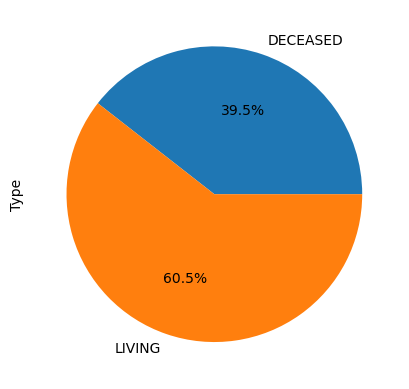

In [14]:
df.groupby('Overall Survival Status').size().plot(kind='pie',
                                                  y = "Overall Survival Status",
                                                  label = "Type",
                                                  autopct='%1.1f%%')

### Balance the data based on the target 
#### We can either up-sample the minority or down-sample the majority

In [15]:
from sklearn.utils import resample

# separate minority and majority classes
majority = df[df["Overall Survival Status"] == "LIVING"]
minority = df[df["Overall Survival Status"] == "DECEASED"]

In [16]:
# downsample majority
data_downsampled = resample(majority,
                          replace=False, # # sample without replacement
                          n_samples=minority.shape[0], # match number in minority class
                          random_state=27) # reproducible results


# combine majority and upsampled minority
data_downsampled = pd.concat([minority, data_downsampled])

# check new class counts
data_downsampled["Overall Survival Status"].value_counts()

Overall Survival Status
DECEASED    10169
LIVING      10169
Name: count, dtype: int64

<Axes: ylabel='Type'>

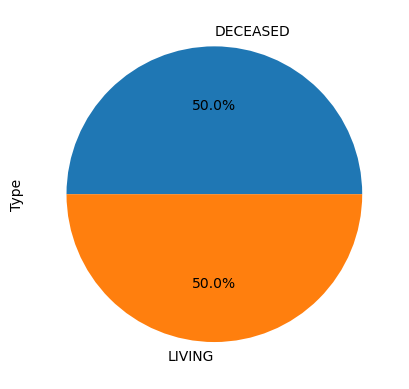

In [17]:
data_downsampled.groupby('Overall Survival Status').size().plot(kind='pie',
                                                  y = "Overall Survival Status",
                                                  label = "Type",
                                                  autopct='%1.1f%%')

In [18]:
data_downsampled.to_csv('cancer_data_downsampled.csv')

In [19]:
import warnings
warnings.filterwarnings("ignore")


In [20]:
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [21]:
# Import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

sns.set_style("darkgrid")
sns.set_context("poster")
plt.rcParams["figure.figsize"] = [8,6]

In [22]:
df = pd.read_csv("cancer_data_downsampled.csv", index_col=0).sample(frac=1).reset_index(drop = True)

df1 = df.dropna(axis=1)
df1.shape

(20338, 38)

In [23]:
df1.head(5)

,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,...,Met Site Count,Oncotree Code,Organ System,Overall Survival Status,Number of Samples Per Patient,Sample coverage,Sample Type,Subtype,Subtype Abbreviation,TMB (nonsynonymous)
0,Bladder Cancer,Bladder Urothelial Carcinoma,No,No,No,No,No,No,No,No,...,0,BLCA,Genitourinary,LIVING,1,582,Primary,Bladder Urothelial,BLCA,11.241075
1,Small Cell Lung Cancer,Small Cell Lung Cancer,No,No,No,No,No,No,Yes,No,...,1,SCLC,Thoracic,LIVING,1,809,Metastasis,Small Cell Lung Cancer,SCLC,12.970471
2,Hepatobiliary Cancer,Intrahepatic Cholangiocarcinoma,Yes,No,No,Yes,No,Yes,Yes,Yes,...,9,IHCH,Developmental GI Tract,DECEASED,1,793,Primary,Cholangio Intrahepatic,CHOL intra,2.936159
3,Colorectal Cancer,Colon Adenocarcinoma,Yes,No,No,No,No,No,No,No,...,1,COAD,Core GI,LIVING,1,736,Metastasis,Colorectal MSS,CRC MSS,6.917585
4,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,No,No,No,Yes,No,No,No,No,...,5,LUAD,Thoracic,DECEASED,1,823,Primary,Lung Adenocarcinoma,LUAD,19.574394


In [24]:
df1.isnull().sum()

Cancer Type                      0
Cancer Type Detailed             0
Distant Mets: Adrenal Gland      0
Distant Mets: Biliary tract      0
Distant Mets: Bladder/UT         0
Distant Mets: Bone               0
Distant Mets: Bowel              0
Distant Mets: Breast             0
Distant Mets: CNS/Brain          0
Distant Mets: Distant LN         0
Distant Mets: Female Genital     0
Distant Mets: Head and Neck      0
Distant Mets: Intra-Abdominal    0
Distant Mets: Kidney             0
Distant Mets: Liver              0
Distant Mets: Lung               0
Distant Mets: Male Genital       0
Distant Mets: Mediastinum        0
Distant Mets: Ovary              0
Distant Mets: Pleura             0
Distant Mets: PNS                0
Distant Mets: Skin               0
Distant Mets: Unspecified        0
FGA                              0
Fraction Genome Altered          0
Gene Panel                       0
Metastatic patient               0
Met Count                        0
Met Site Count      

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = df1.columns.tolist()

for column in cols:
    if df1[column].dtype == "object":
        df1[column] =  le.fit_transform(df1[column].astype(str))
        
df1 = df1.reset_index()
df1.head(5)

,index,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,...,Met Site Count,Oncotree Code,Organ System,Overall Survival Status,Number of Samples Per Patient,Sample coverage,Sample Type,Subtype,Subtype Abbreviation,TMB (nonsynonymous)
0,0,2,5,0,0,0,0,0,0,0,...,0,7,4,1,1,582,1,3,3,11.241075
1,1,23,67,0,0,0,0,0,0,1,...,1,66,9,1,1,809,0,39,37,12.970471
2,2,12,34,1,0,0,1,0,1,1,...,9,38,2,0,1,793,1,11,8,2.936159
3,3,5,11,1,0,0,0,0,0,0,...,1,13,1,1,1,736,0,13,10,6.917585
4,4,15,40,0,0,0,1,0,0,0,...,5,44,9,0,1,823,1,21,26,19.574394


In [26]:
df1.head()

,index,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,...,Met Site Count,Oncotree Code,Organ System,Overall Survival Status,Number of Samples Per Patient,Sample coverage,Sample Type,Subtype,Subtype Abbreviation,TMB (nonsynonymous)
0,0,2,5,0,0,0,0,0,0,0,...,0,7,4,1,1,582,1,3,3,11.241075
1,1,23,67,0,0,0,0,0,0,1,...,1,66,9,1,1,809,0,39,37,12.970471
2,2,12,34,1,0,0,1,0,1,1,...,9,38,2,0,1,793,1,11,8,2.936159
3,3,5,11,1,0,0,0,0,0,0,...,1,13,1,1,1,736,0,13,10,6.917585
4,4,15,40,0,0,0,1,0,0,0,...,5,44,9,0,1,823,1,21,26,19.574394


In [27]:
df1.shape

(20338, 39)

In [28]:
from sklearn.model_selection import train_test_split

# Split dataset into features and target variable
X = df1.drop('Overall Survival Status', axis=1)
y = df1['Overall Survival Status']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# calculate the ratio of negative class to the positive class
ratio = float(np.sum(y == 0)) / np.sum(y==1)

In [29]:
y.value_counts()

Overall Survival Status
1    10169
0    10169
Name: count, dtype: int64

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Instantiate the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50,100,500,1000],
    'max_depth': [1,3,5,7,9,10],
    'learning_rate': [0.01, 0.1, 0.3]
}


# Set up the grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=ratio, use_label_encoder=False, **best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_preds = best_model.predict(X_test)

# AUC. Predict class probabilities
xgb_probs = best_model.predict_proba(X_test)[:, 1]

# Print accuracy
accuracy = accuracy_score(y_test, xgb_preds)
print("XGBOOST Accuracy score:", accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
XGBOOST Accuracy score: 0.742133726647001


In [31]:
xgb_probs

array([0.7183132 , 0.90245134, 0.2549298 , ..., 0.4379158 , 0.20354316,
       0.06974979], dtype=float32)

## Print Classification report

In [32]:
# from sklearn.metrics import classification_report

# # assuming y_test are the true labels and predictions are the predicted labels
# print(classification_report(y_test, predictions))


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

## Plot AUC

In [34]:
# # predict probabilities
# y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# # compute false positive rate, true positive rate
# fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# # compute AUC-ROC
# auc_roc = roc_auc_score(y_test, y_pred_prob)

# roc_auc = roc_auc_score(y_test, y_pred_prob)

# print("AUC-ROC: %.2f%%" % (auc_roc * 100.0))

In [35]:
# # plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

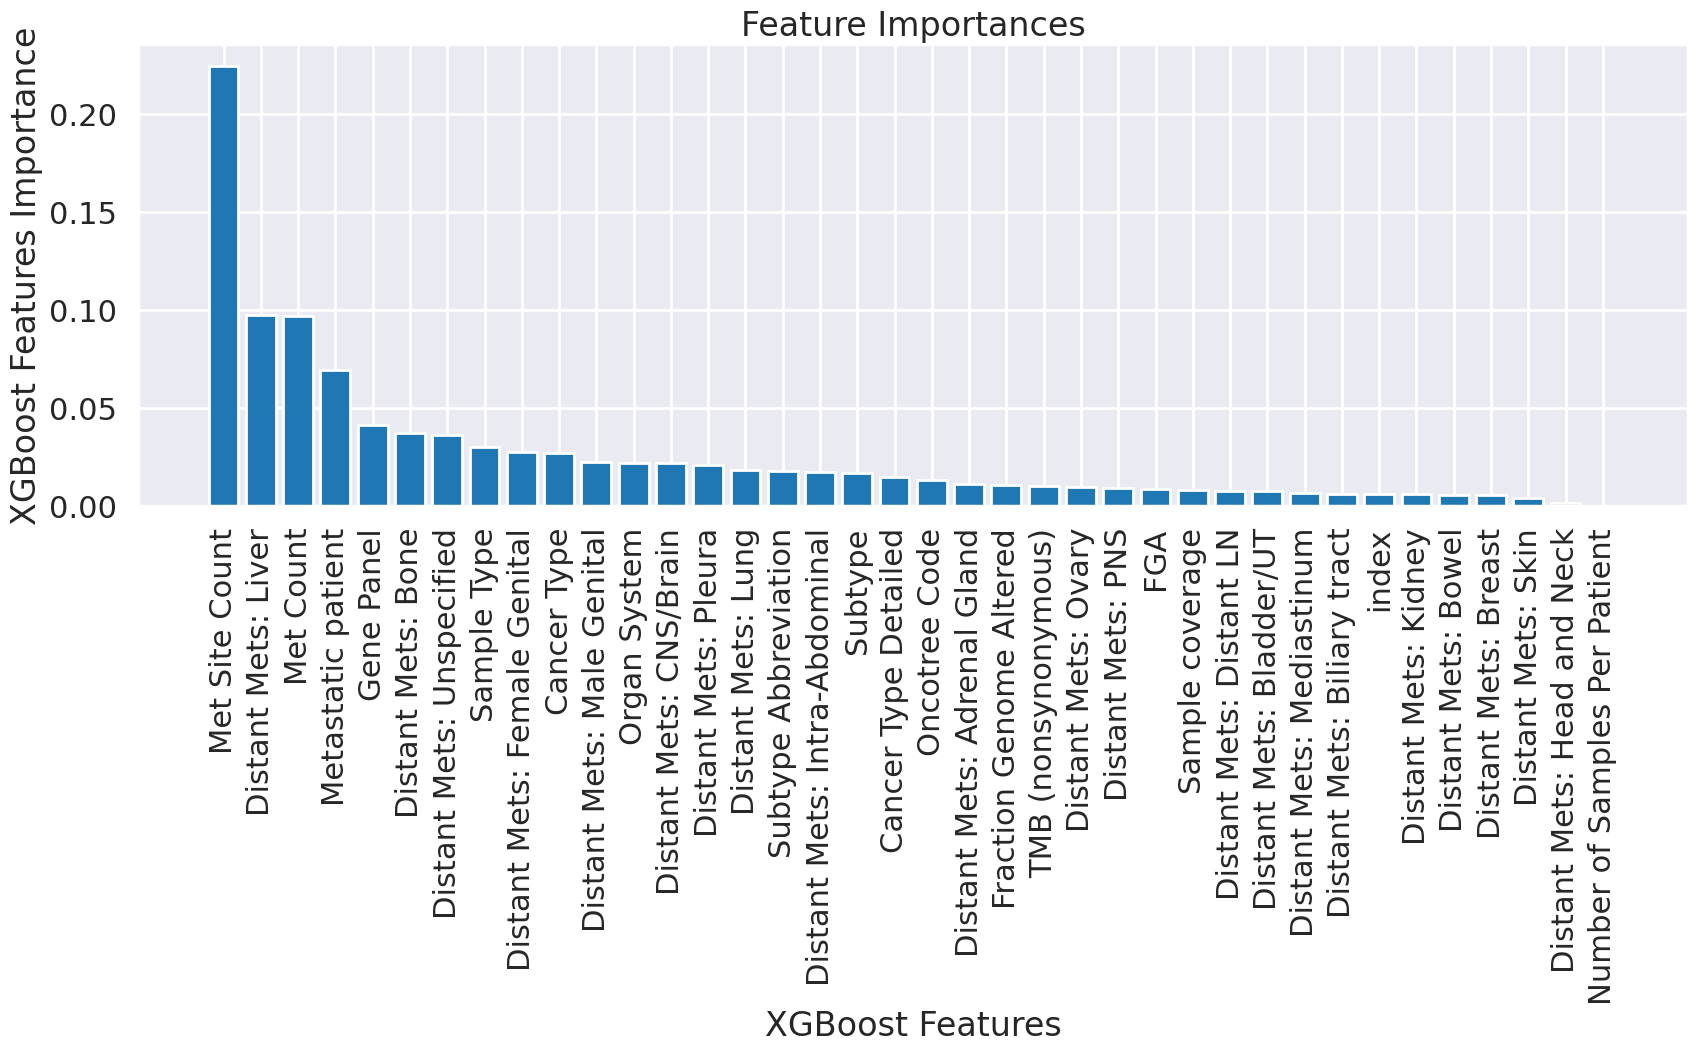

In [36]:
# Get feature importances
importances = best_model.feature_importances_

# Sort the features by importance score in descending order
sorted_idx = importances.argsort()[::-1]
features_sorted = [X_train.columns[idx] for idx in sorted_idx]
importances_sorted = importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(20,6))
plt.bar(range(X_train.shape[1]), importances_sorted)
plt.xticks(range(X_train.shape[1]), features_sorted, rotation=90)
plt.xlabel('XGBoost Features')
plt.ylabel('XGBoost Features Importance')
plt.title("Feature Importances")
plt.show()

In [37]:
import shap

# get shap values
explainer = shap.Explainer (best_model)
# Compute SHAP values for your dataset
shap_values = explainer(X_train)

print(shap_values.shape)

(16270, 38)


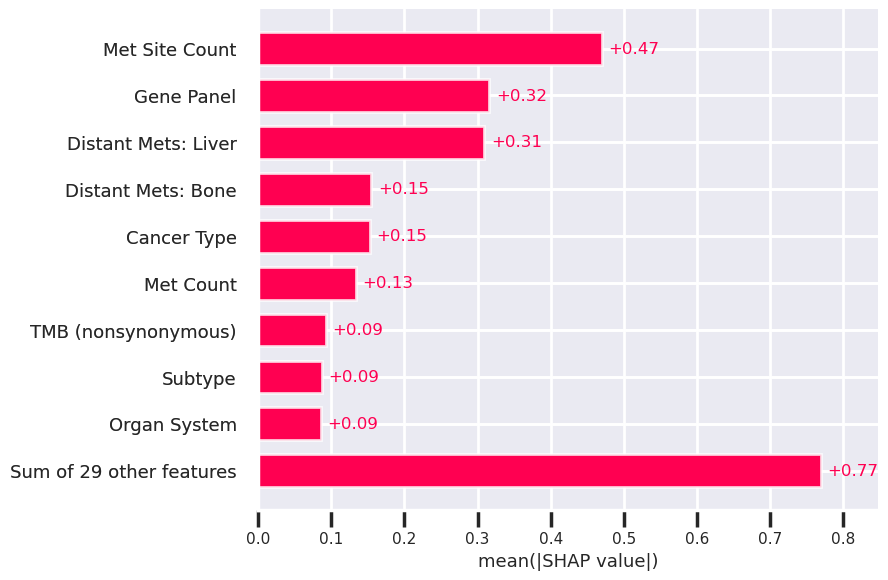

In [38]:
# Generate the mean SHAP plot
shap.plots.bar(shap_values)

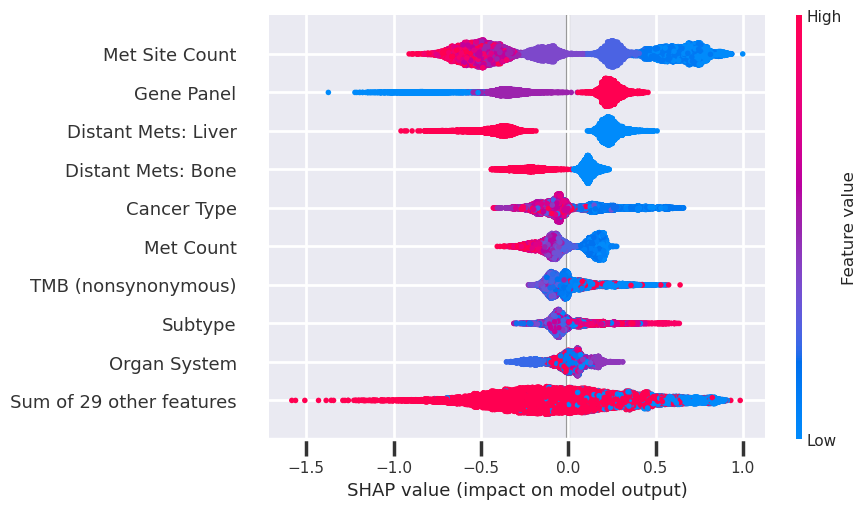

In [39]:
shap.plots.beeswarm(shap_values)

In [40]:
# shap.summary_plot(shap_va lues, X_train)

In [41]:
sum(y_test)

2019

In [42]:
print(sum(shap_values[0]))

.values =
-2.3189215030738524

.base_values =
0.14713713806122541

.data =
5517.3514318035905


In [43]:
xgb_probs[0:13]

array([0.7183132 , 0.90245134, 0.2549298 , 0.18492666, 0.13950947,
       0.72113675, 0.36449084, 0.6127154 , 0.32194605, 0.563099  ,
       0.12824288, 0.10466183, 0.23455706], dtype=float32)

In [44]:
y_test[0:3]

5852    1
2323    1
2621    0
Name: Overall Survival Status, dtype: int64

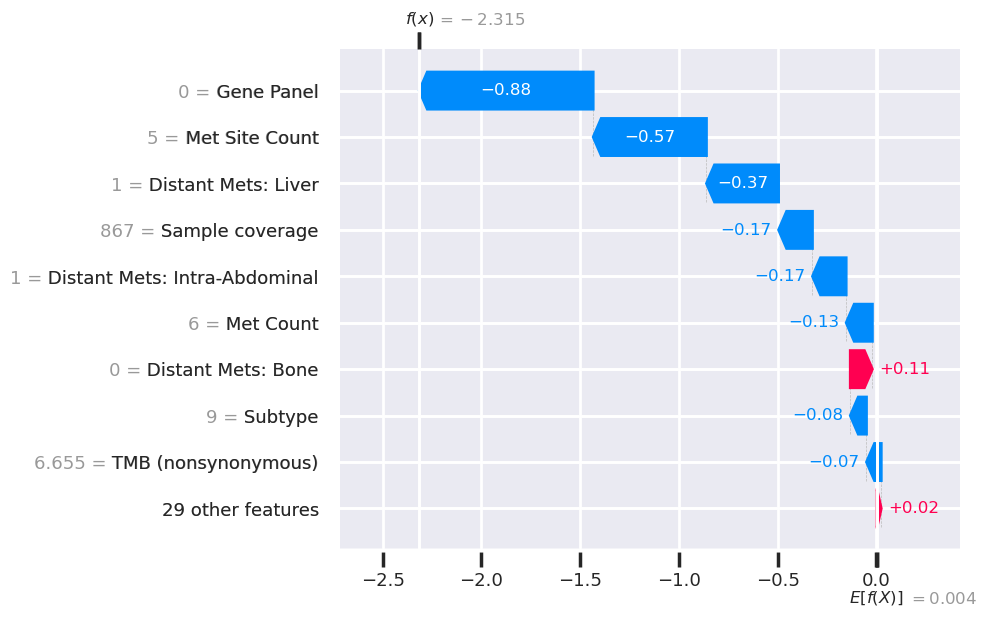

In [45]:
# waterfall plot for first instance
shap.plots.waterfall(shap_values[0])

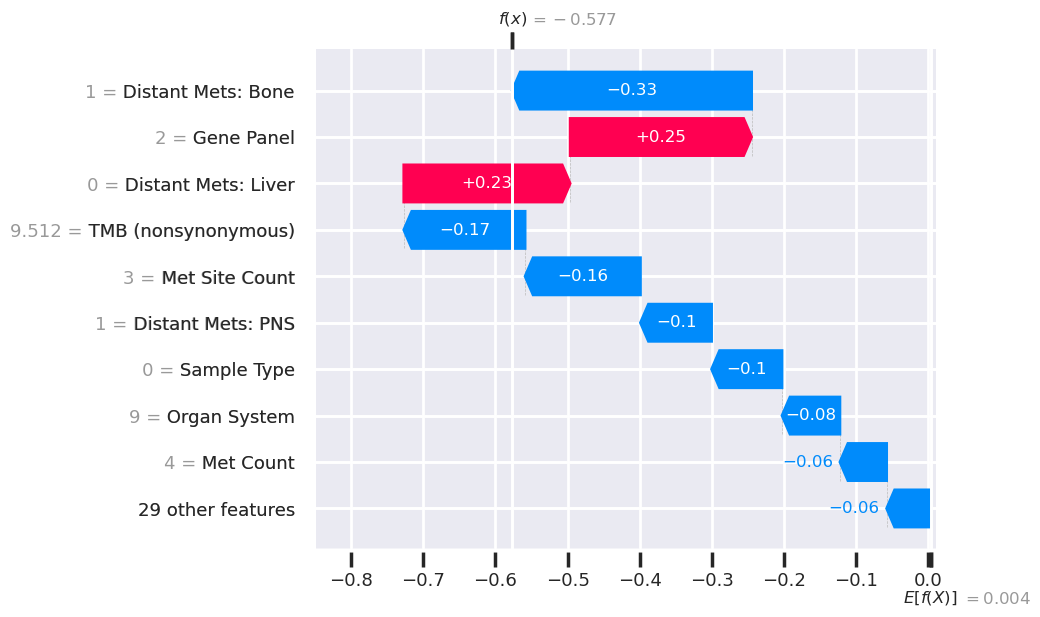

In [46]:
shap.plots.waterfall(shap_values[1])

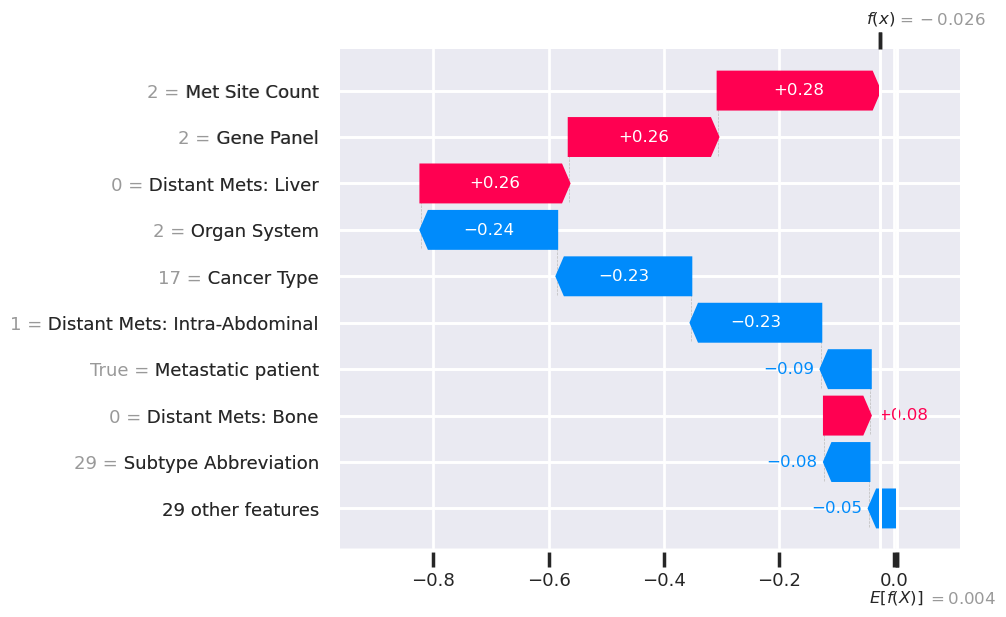

In [47]:
shap.plots.waterfall(shap_values[2])

In [48]:
shap.initjs()

In [49]:
shap.plots.force(shap_values[0])


In [50]:
shap.plots.force(shap_values[0:1000])

In [51]:
# shap.plots.force(shap_values[0:10000])

In [52]:
xgb_probs[0:5]

array([0.7183132 , 0.90245134, 0.2549298 , 0.18492666, 0.13950947],
      dtype=float32)

In [53]:
# import xgboost as xgb
# import shap

# # Train an XGBoost model
# model = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(X, label=y), 100)

# # Create an explainer object
# explainer = shap.Explainer(model)

# # Compute SHAP values
# shap_values = explainer(X)

# # Plot the SHAP summary plot
# plt.figure(figsize=(20,20))
# shap.summary_plot(shap_values, X, plot_type="dot")

# plt.show()

## Apply Naive Bayes

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


# Instantiate the Naive Bayes model
model = BernoulliNB()

# Define the hyperparameter search space
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = BernoulliNB(**best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
nb_preds = best_model.predict(X_test)

# AUC. Predict class probabilities
nb_probs = best_model.predict_proba(X_test)[:, 1]

# Print accuracy
accuracy = accuracy_score(y_test, nb_preds)
print("NB Accuracy score:", accuracy)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'alpha': 10.0, 'binarize': 0.5, 'fit_prior': False}
NB Accuracy score: 0.7168141592920354


In [55]:
# # Get feature importances
# importances = best_model.feature_importances_

# # Sort the features by importance score in descending order
# sorted_idx = importances.argsort()[::-1]
# features_sorted = [X_train.columns[idx] for idx in sorted_idx]
# importances_sorted = importances[sorted_idx]

# # Plot feature importances
# plt.figure(figsize=(20,6))
# plt.bar(range(X_train.shape[1]), importances_sorted)
# plt.xticks(range(X_train.shape[1]), features_sorted, rotation=90)
# plt.xlabel('NB Features')
# plt.ylabel('NB Features Importance')
# plt.title("Feature Importances")
# plt.show()

## Decision Tree model

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Instantiate the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
tree_preds = best_model.predict(X_test)

# AUC. Predict class probabilities
tree_probs = best_model.predict_proba(X_test)[:, 1]

# Print accuracy
accuracy = accuracy_score(y_test, tree_preds)
print("Tree Accuracy score:", accuracy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tree Accuracy score: 0.7153392330383481


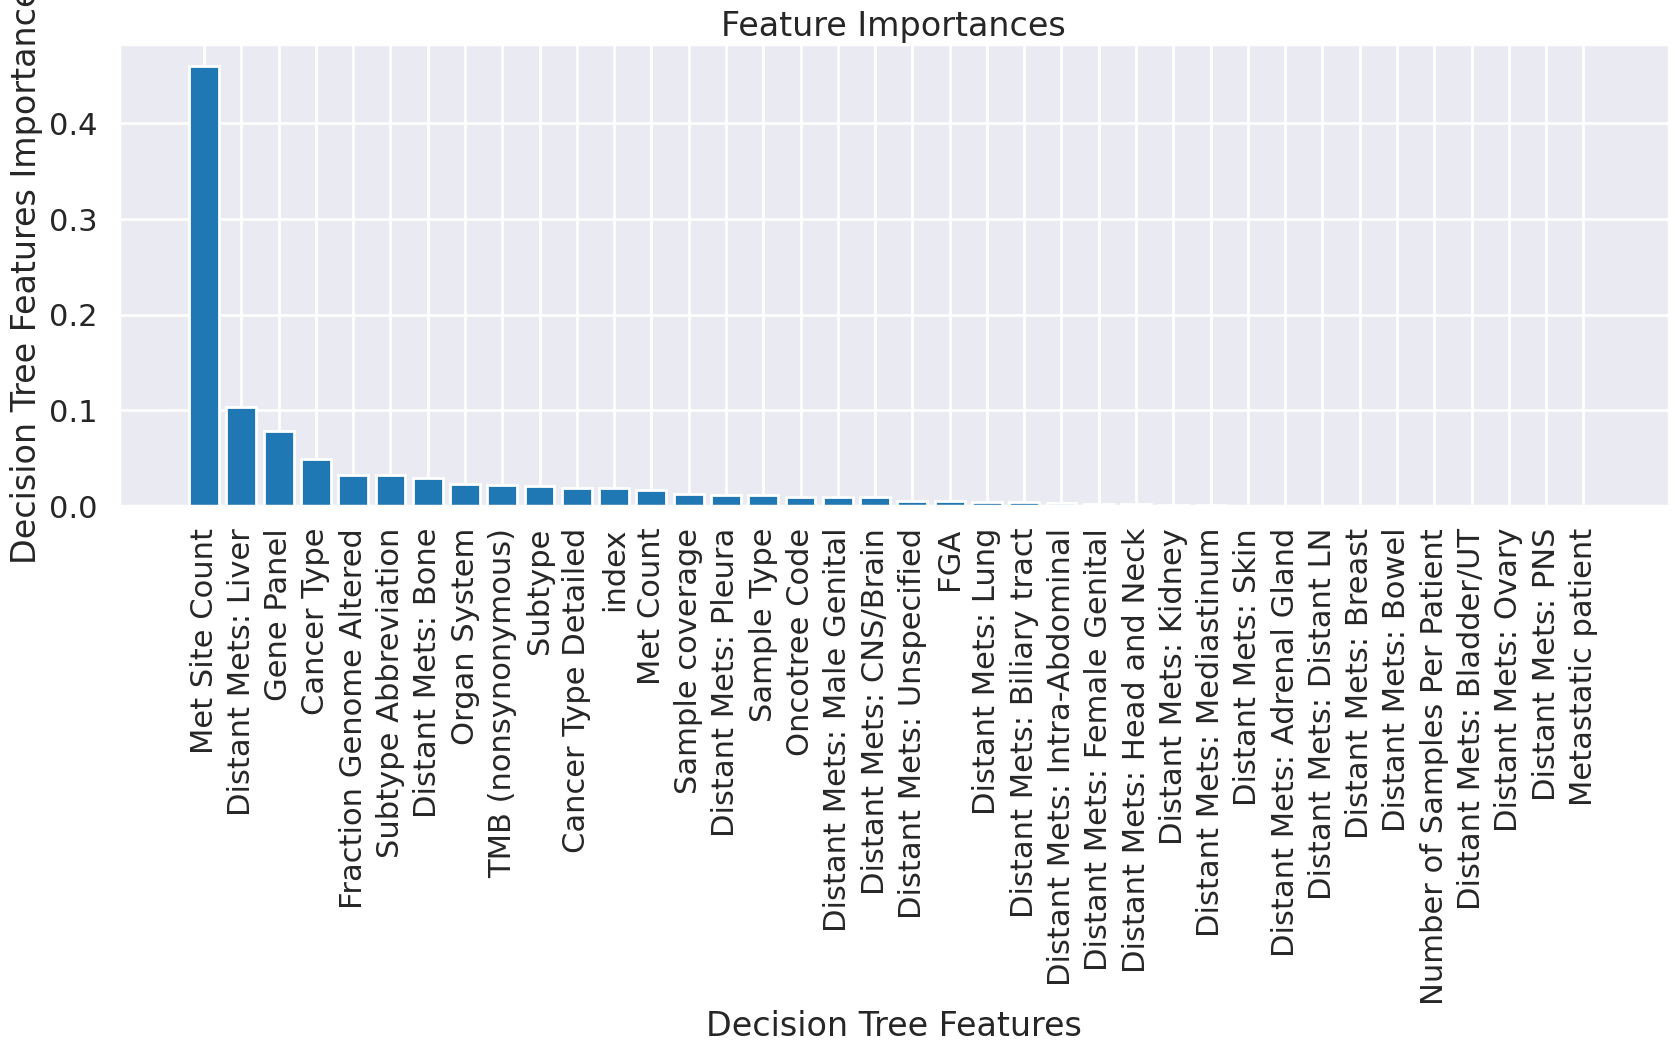

In [57]:
# Get feature importances
importances = best_model.feature_importances_

# Sort the features by importance score in descending order
sorted_idx = importances.argsort()[::-1]
features_sorted = [X_train.columns[idx] for idx in sorted_idx]
importances_sorted = importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(20,6))
plt.bar(range(X_train.shape[1]), importances_sorted)
plt.xticks(range(X_train.shape[1]), features_sorted, rotation=90)
plt.xlabel('Decision Tree Features')
plt.ylabel('Decision Tree Features Importance')
plt.title("Feature Importances")
plt.show()

## Logistic regression

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = LogisticRegression(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
lr_preds = best_model.predict(X_test)

# AUC. Predict class probabilities
lr_probs = best_model.predict_proba(X_test)[:, 1]

# Print accuracy
accuracy = accuracy_score(y_test, lr_preds)
print("XGBOOST Accuracy score:", accuracy)


Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
XGBOOST Accuracy score: 0.7295968534906588


In [59]:
# # Get feature importances
# importances = best_model.feature_importances_

# # Sort the features by importance score in descending order
# sorted_idx = importances.argsort()[::-1]
# features_sorted = [X_train.columns[idx] for idx in sorted_idx]
# importances_sorted = importances[sorted_idx]

# # Plot feature importances
# plt.figure(figsize=(20,6))
# plt.bar(range(X_train.shape[1]), importances_sorted)
# plt.xticks(range(X_train.shape[1]), features_sorted, rotation=90)
# plt.xlabel('Logistic Regression Features')
# plt.ylabel('Logistic Regression Features Importance')
# plt.title("Feature Importances")
# plt.show()

## Generate and print classification reports

In [60]:
# Generate and print classification reports
models = {
    "XGBoost": xgb_preds,
    "Naive Bayes": nb_preds,
    "Decision Tree": tree_preds,
    "Logistic Regression": lr_preds
}

for model_name, preds in models.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, preds))
    print("-" * 60)

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2049
           1       0.75      0.73      0.74      2019

    accuracy                           0.74      4068
   macro avg       0.74      0.74      0.74      4068
weighted avg       0.74      0.74      0.74      4068

------------------------------------------------------------
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2049
           1       0.74      0.67      0.70      2019

    accuracy                           0.72      4068
   macro avg       0.72      0.72      0.72      4068
weighted avg       0.72      0.72      0.72      4068

------------------------------------------------------------
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      20

## Compute ROC curve

In [61]:
# Compute ROC curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

## Compute AUC-ROC value

In [62]:
# Compute AUC-ROC value
xgb_auc = roc_auc_score(y_test, xgb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
lr_auc = roc_auc_score(y_test, lr_probs)


## Plot ROC curves

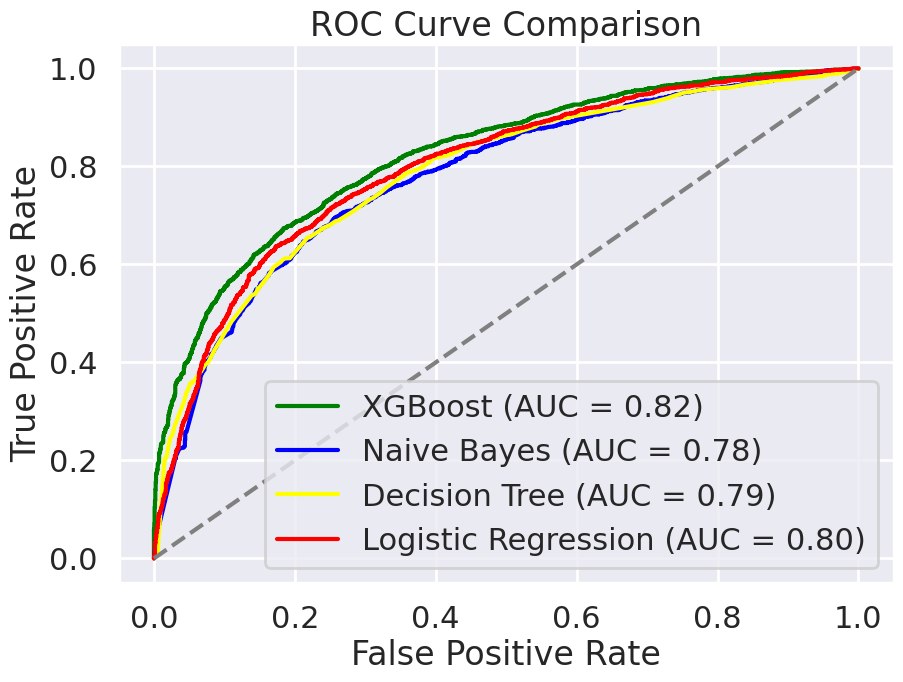

In [63]:
# Plot ROC curves
plt.figure(figsize=(10, 7))

plt.plot(xgb_fpr, xgb_tpr, color='green', label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='blue', label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(tree_fpr, tree_tpr, color='yellow', label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, color='red', label=f'Logistic Regression (AUC = {lr_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()